 Model Performance Visualization
This notebook visualizes the performance of BERT models fine-tuned on two datasets:
- ADE Corpus
- PsyTAR

The models are evaluated both on their training dataset and cross-evaluated on the other dataset.

Metrics: Accuracy, Precision (micro), Recall (micro), F1 (micro).

In [43]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
ade_to_psytar_file = "bert_model_fold_1_set_3_psytar_classification_eval.json"
psytar_to_ade_file = "bert_model_fold_1_set_1_ade_classification_eval.json"

In [45]:
# Load JSON files
with open(ade_to_psytar_file, "r") as f:
    ade_to_psytar = json.load(f)

with open(psytar_to_ade_file, "r") as f:
    psytar_to_ade = json.load(f)


In [46]:
# Extract per-class F1 scores
label_metrics = ["not-related_f1-score", "related_f1-score"]


In [47]:
results = [
    {
        "evaluation": "ADE → PsyTAR",
        "not-related": ade_to_psytar["not-related_f1-score"],
        "related": ade_to_psytar["related_f1-score"]
    },
    {
        "evaluation": "PsyTAR → ADE",
        "not-related": psytar_to_ade["not-related_f1-score"],
        "related": psytar_to_ade["related_f1-score"]
    }
    ]

In [48]:

df = pd.DataFrame(results)
print("Per-Class F1-scores:")
print(df)


Per-Class F1-scores:
     evaluation  not-related   related
0  ADE → PsyTAR     0.774154  0.021333
1  PsyTAR → ADE     0.730882  0.428125


In [49]:
# Reshape for plotting
df_melted = df.melt(id_vars="evaluation", value_vars=["not-related", "related"],
                    var_name="label", value_name="f1_score")

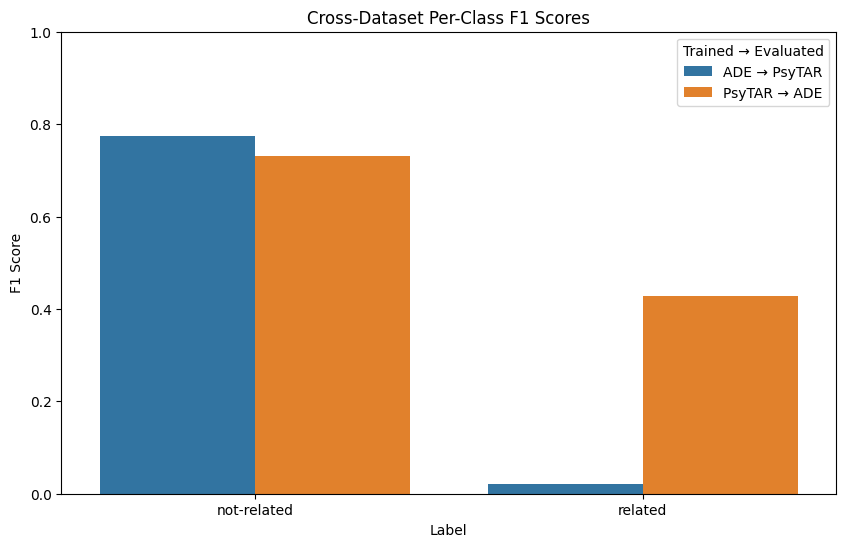

In [50]:
# Plot per-class F1-scores
plt.figure(figsize=(10,6))
sns.barplot(data=df_melted, x="label", y="f1_score", hue="evaluation")
plt.title("Cross-Dataset Per-Class F1 Scores")
plt.ylim(0, 1)
plt.ylabel("F1 Score")
plt.xlabel("Label")
plt.legend(title="Trained → Evaluated")
plt.show()

In [51]:
metrics_of_interest = ["accuracy", "precision_micro", "recall_micro", "f1_micro"]


In [52]:
results = [
    {
        "evaluation": "ADE → PsyTAR",
        **{m: ade_to_psytar[m] for m in metrics_of_interest}
    },
    {
        "evaluation": "PsyTAR → ADE",
        **{m: psytar_to_ade[m] for m in metrics_of_interest}
    }
]

In [53]:
df = pd.DataFrame(results)
print("Cross-Dataset Evaluation Results:")
print(df)

Cross-Dataset Evaluation Results:
     evaluation  accuracy  precision_micro  recall_micro  f1_micro
0  ADE → PsyTAR     0.633            0.633         0.633     0.633
1  PsyTAR → ADE     0.634            0.634         0.634     0.634


In [54]:
# Reshape dataframe for plotting
df_melted = df.melt(
    id_vars="evaluation", 
    value_vars=metrics_of_interest, 
    var_name="metric", 
    value_name="score"
)

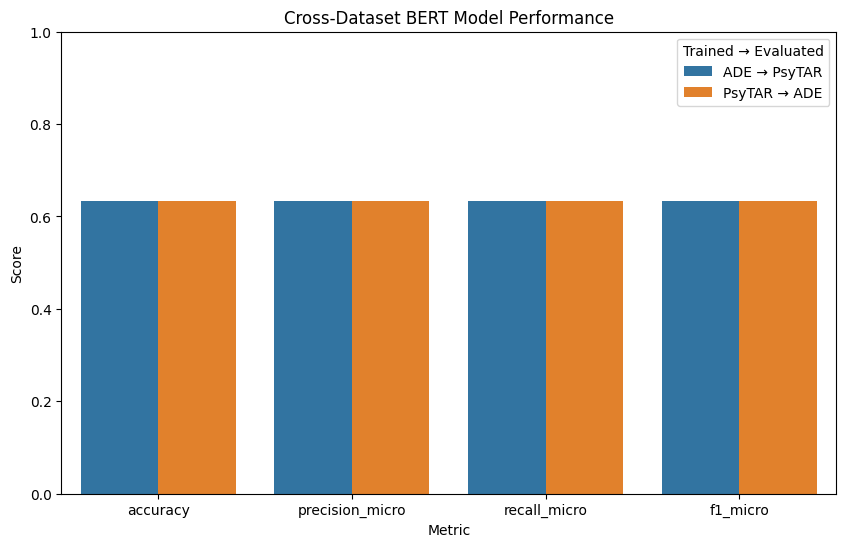

In [55]:
#Bar plot of cross-dataset evaluation
plt.figure(figsize=(10,6))
sns.barplot(data=df_melted, x="metric", y="score", hue="evaluation")
plt.title("Cross-Dataset BERT Model Performance")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.xlabel("Metric")
plt.legend(title="Trained → Evaluated")
plt.show()

In [56]:
# Combine results into a DataFrame
models_data = {
    "ADE → PsyTAR": ade_to_psytar,
    "PsyTAR → ADE": psytar_to_ade
}


In [57]:

# Per-class metrics
labels = ["not-related", "related"]
per_class_metrics = ["precision", "recall", "f1-score", "support"]

rows = []
for eval_name, data in models_data.items():
    for label in labels:
        row = {"evaluation": eval_name, "label": label}
        for metric in per_class_metrics:
            row[metric] = data[f"{label}_{metric}"]
        rows.append(row)

In [58]:
df_per_class = pd.DataFrame(rows)
print("\nPer-Class Metrics:")
print(df_per_class)



Per-Class Metrics:
     evaluation        label  precision    recall  f1-score  support
0  ADE → PsyTAR  not-related   0.632161  0.998413  0.774154    630.0
1  ADE → PsyTAR      related   0.800000  0.010811  0.021333    370.0
2  PsyTAR → ADE  not-related   0.766975  0.698034  0.730882    712.0
3  PsyTAR → ADE      related   0.389205  0.475694  0.428125    288.0


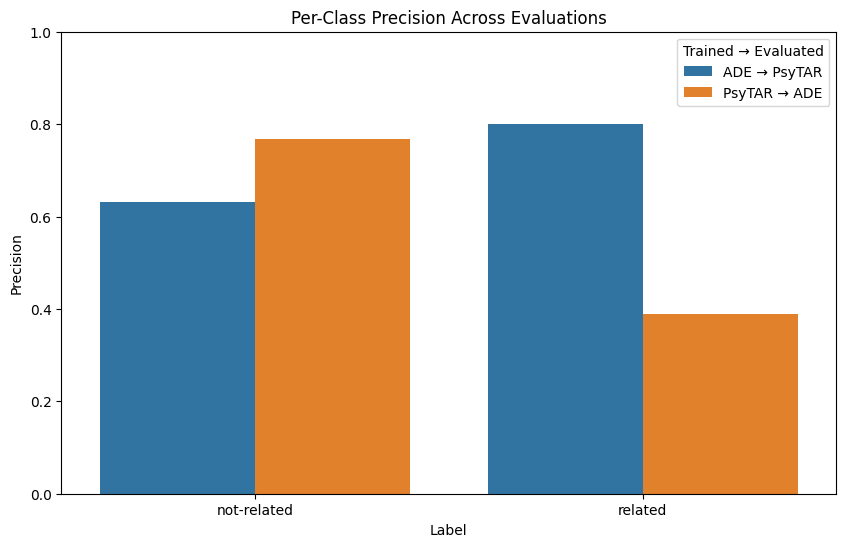

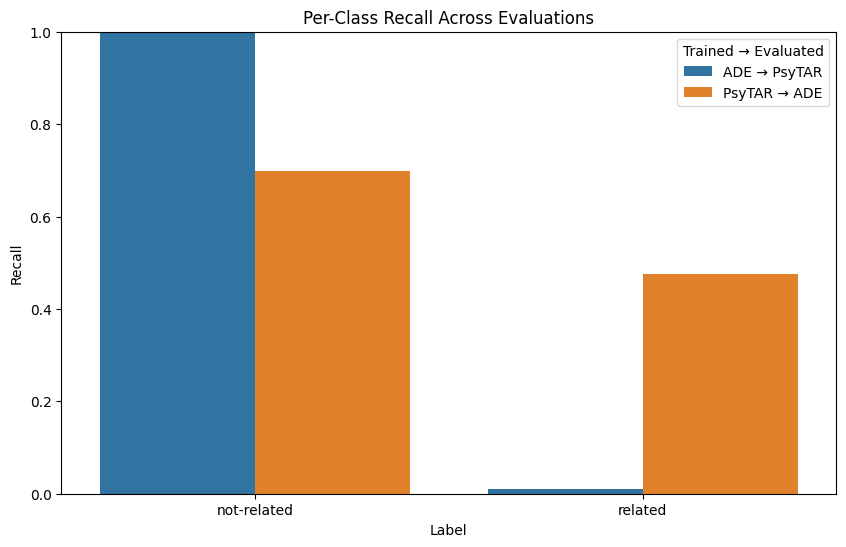

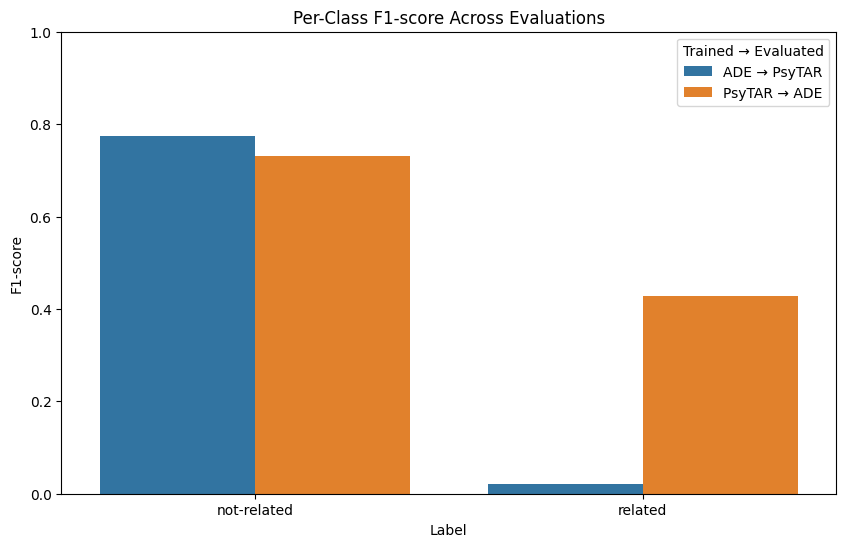

In [59]:
# Plot per-class metrics (precision, recall, f1-score)
metrics_to_plot = ["precision", "recall", "f1-score"]

for metric in metrics_to_plot:
    plt.figure(figsize=(10,6))
    sns.barplot(data=df_per_class, x="label", y=metric, hue="evaluation")
    plt.title(f"Per-Class {metric.capitalize()} Across Evaluations")
    plt.ylim(0, 1)
    plt.ylabel(metric.capitalize())
    plt.xlabel("Label")
    plt.legend(title="Trained → Evaluated")
    plt.show()


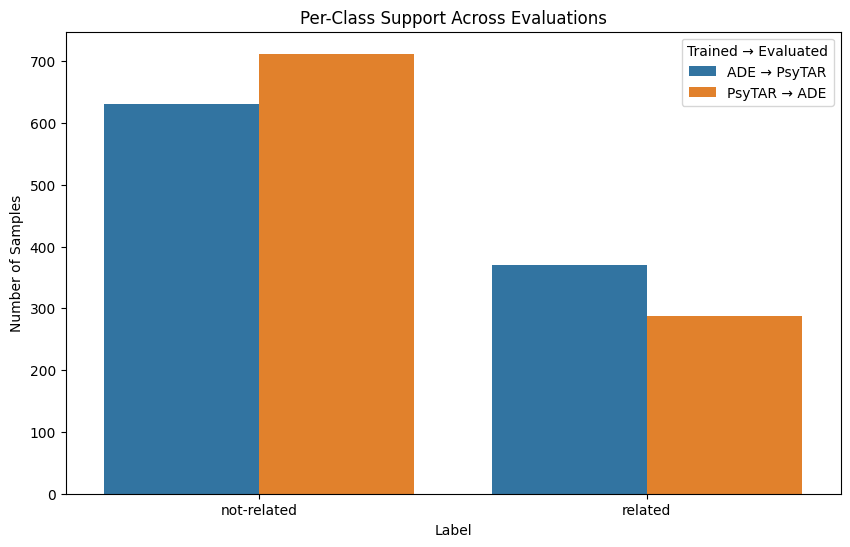

In [60]:
# Plot support as a separate bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=df_per_class, x="label", y="support", hue="evaluation")
plt.title("Per-Class Support Across Evaluations")
plt.ylabel("Number of Samples")
plt.xlabel("Label")
plt.legend(title="Trained → Evaluated")
plt.show()


We suspect that the model finetuned on the ADE Corpus performs badly on PsyTAR because there is a class imbalance between the related and unrelated labels in the ADE Corpus. This is especially pronounced as we took 5000 samples for both models in this notebook while PsyTAR is far better balanced. We think that this problem would not occur that pronounced with the full ADE Corpus. But then the sample sizes between PsyTAR and ADE Corpus would have been imbalanced.

For future work we think about preprocessing the ADE Corpus that it hase the same class balance as PsyTAR and the same sample size.